In [1]:
# AML Project 1

# MI: 1 = yes, 2 = no
# gener: 1 = female, 2 = male

# simple kNN example
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

X = [[0], [0], [2], [3]]
y = [0, 0, 1, 1]

neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[1.1]]))

[0]
[[0.66666667 0.33333333]]


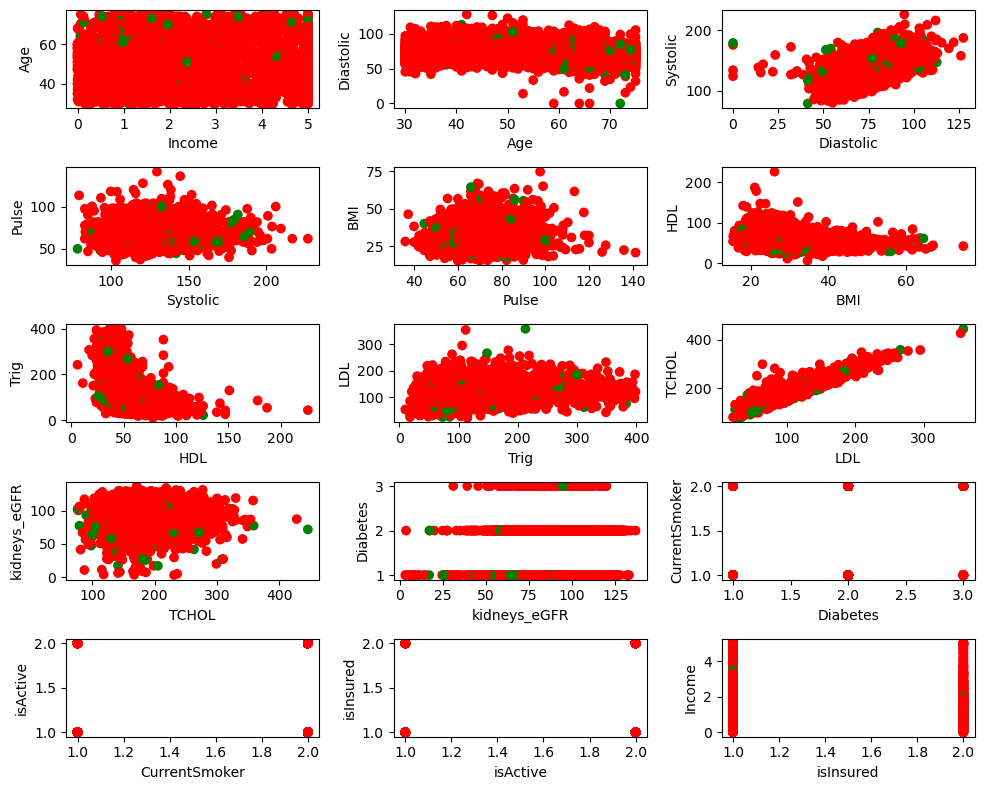

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 8))

data = pd.read_csv("NHANES_data_train.csv")

df = pd.DataFrame(data)

# Print columns (optional)
# print(df.columns)

# Selecting relevant features
X = df[['Income', 'Age', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = df['MI']

# Plotting
Labels = y
colors = ['green', 'red']
clabels = [colors[i-1] for i in Labels]

fig = plt.figure()

features = X.columns

for fig in range(15):
    plt.subplot(5, 3, fig+1)
    x = X[features[fig]]
    y = X[features[(fig+1)%15]]
    plt.scatter(x, y, color=clabels)
    plt.xlabel(features[fig])
    plt.ylabel(features[(fig+1)%15])

plt.tight_layout()
plt.show()


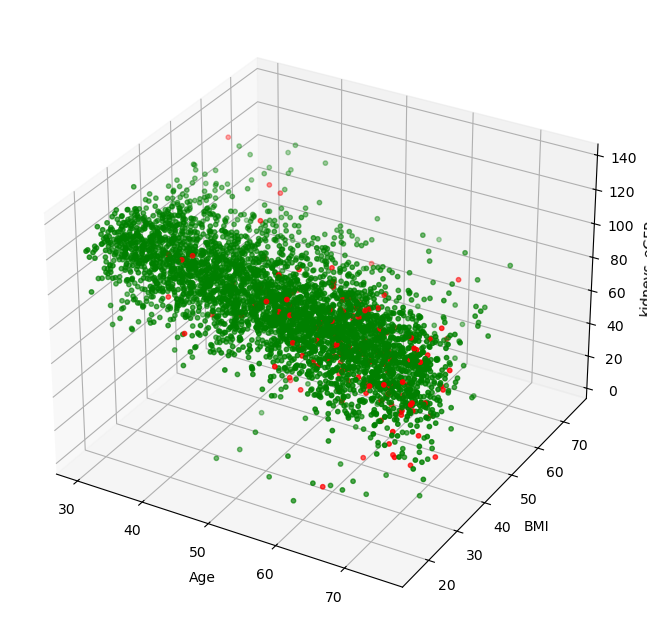

In [3]:
# Plotting a 3D scatter plot
plt.rc("figure", figsize=(10, 8))

data = pd.read_csv("NHANES_data_train.csv")
df = pd.DataFrame(data)

# Selecting relevant features
X = df[['Income', 'Age', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = df['MI']

# Map labels to colors
colors = {'MI': {1: 'red', 2: 'green'}}  # 1 represents MI and 2 represents non-MI
clabels = y.map(colors['MI'])

# Plotting a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['BMI'], X['kidneys_eGFR'], c=clabels, marker='o', s=10)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('kidneys_eGFR')
plt.show()


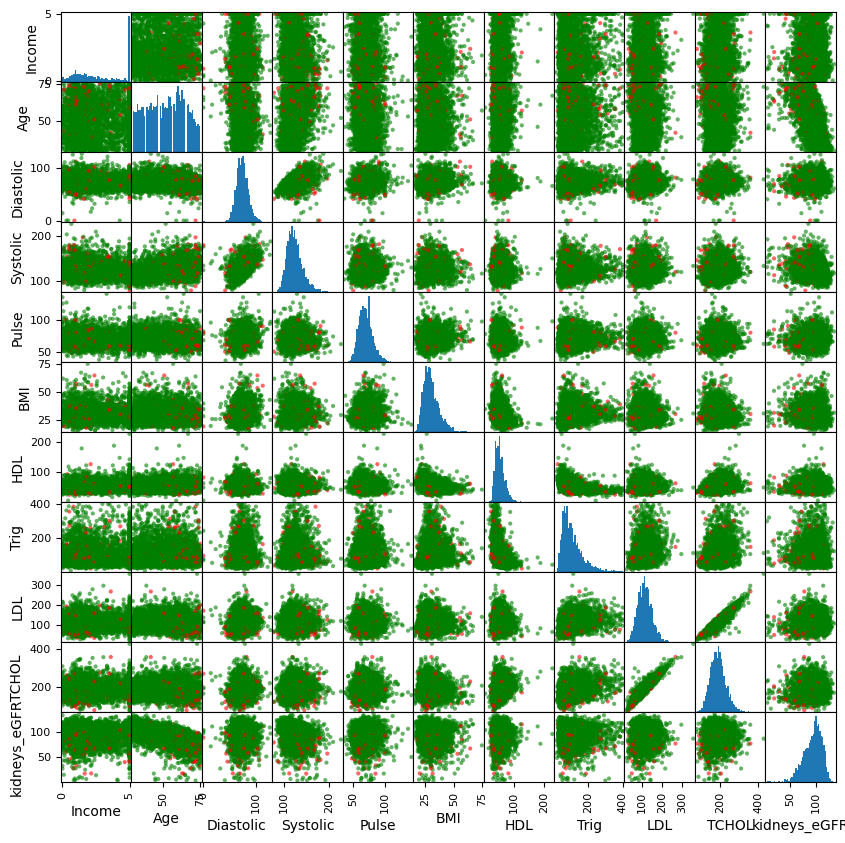

In [4]:
from pandas.plotting import scatter_matrix

plt.rc("figure", figsize=(10, 8))

data = pd.read_csv("NHANES_data_train.csv")
df = pd.DataFrame(data)

# Drop rows with missing values in relevant columns
df_cleaned = df[['Income', 'Age', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured', 'MI']].dropna()

# Selecting relevant features
X = df_cleaned[['Income', 'Age', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR']]
y = df_cleaned['MI']

# Map labels to colors
colors = {1: 'red', 2: 'green'}  # Assuming 1 represents MI and 2 represents non-MI
clabels = y.map(colors)

# Plotting a scatter matrix
scatter_matrix(X, color=clabels, alpha=0.6, figsize=(10, 10), hist_kwds={'bins': 50})
plt.show()
